<a href="https://colab.research.google.com/github/arr9666/Bank_note/blob/main/Bank_Note_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Below code is for getting figure in center alignment
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

</style>
""")

## Basic imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

### Load dataset

In [3]:
# location of the dataset
url = 'https://raw.githubusercontent.com/arr9666/Bank_note/main/BankNote_Authentication.csv'

data = pd.read_csv(url, header=None)
data.columns = ['variance','skewness','curtosis','entropy','class']

In [4]:
print(data.shape)
data.head()

(1372, 5)


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## Getting information of dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


## Getting description of dataset

In [6]:
# getting statistical information about the data
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


## checking duplicate value in dataset

In [7]:
data.duplicated().sum()

24

In [8]:
# droping duplicated values
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

0

## Checking the Nan value

In [10]:
data.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

### Heat map

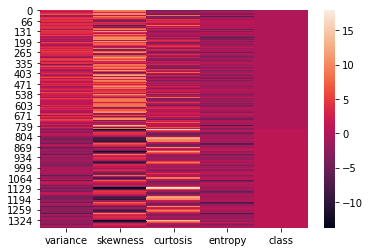

In [11]:
sb.heatmap(data)
plt.show()

## EDA

### Check for Normal Distribution

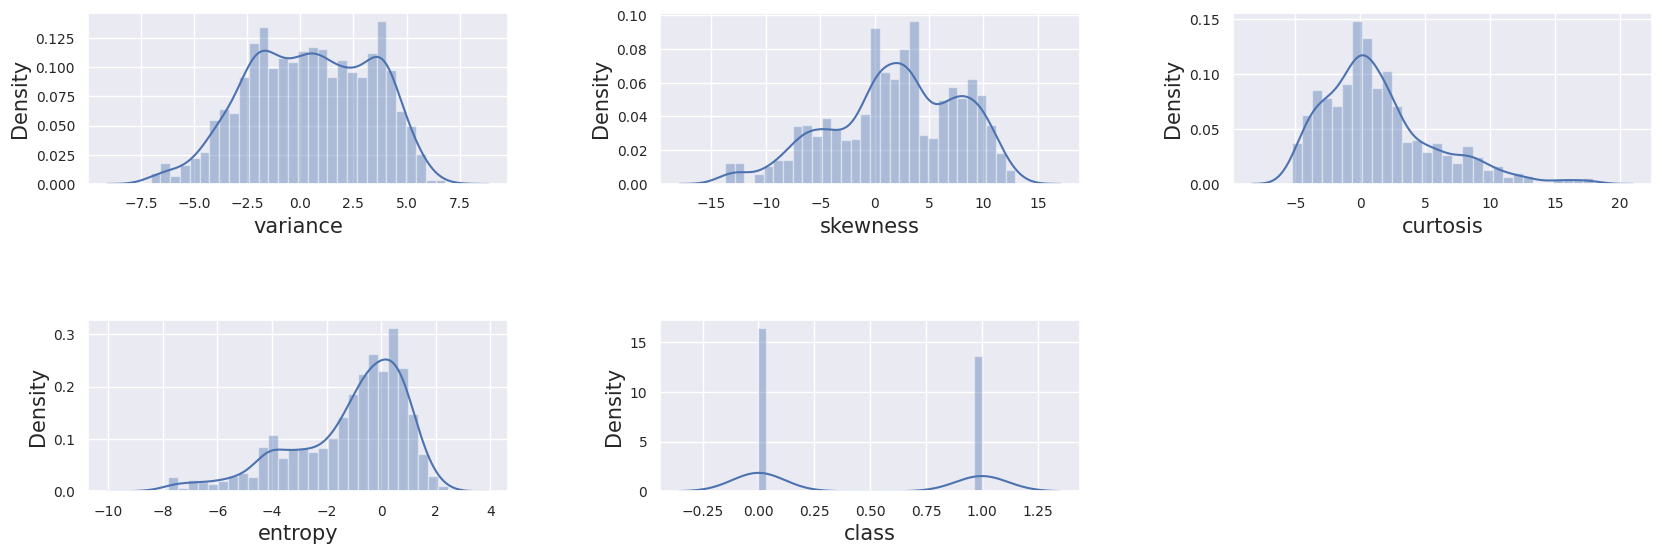

In [12]:
sb.set(rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15,"xtick.labelsize":10,"ytick.labelsize":10,
            "legend.fontsize":8},style="darkgrid")
fig = plt.figure(figsize=(18,7),dpi=100)
for index,col in enumerate(data):
    plt.subplot(2,3,index+1)
    sb.distplot(data.loc[:,col].dropna(),kde=True,bins=30)
fig.tight_layout(pad=4.0)
plt.show()

In [13]:
from scipy.stats import skew, kurtosis
def skewedness(data):
    skewed=[]
    for col in data:
        sk=skew(data[col])
        if(sk>=1.96 or sk<=-1.96):
            skewed.append(col)
    return skewed
print(skewedness(data))

[]


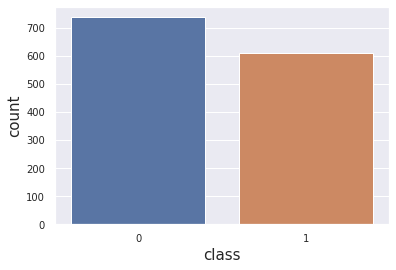

In [14]:
sb.countplot(x='class',data=data)

plt.show()

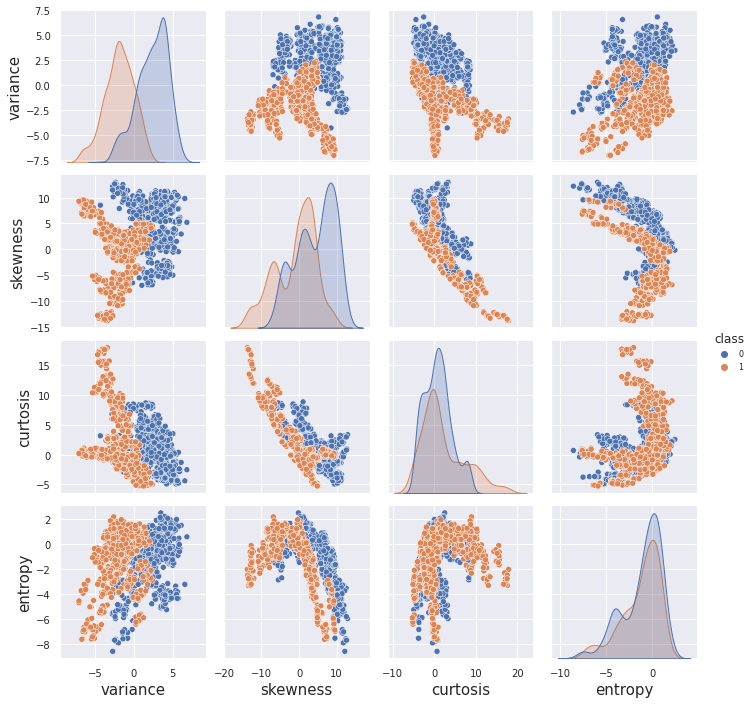

In [15]:
# pair plot
sb.pairplot(data, hue="class")
plt.show()

## Checking Outliers

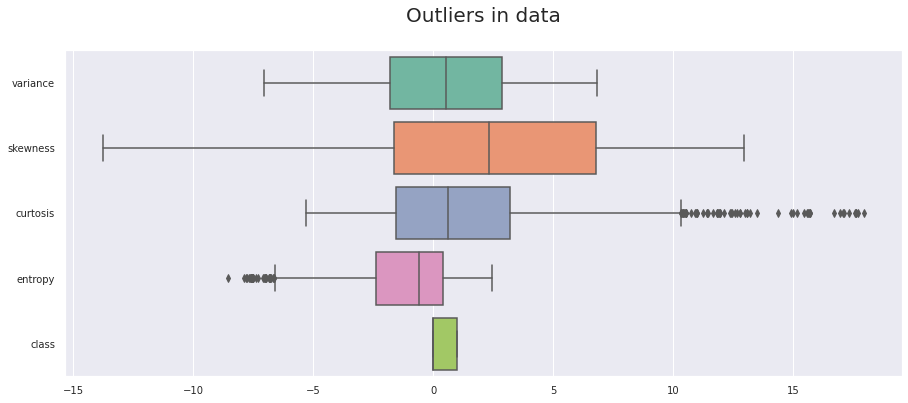

In [16]:
plt.figure(figsize=(15,6))
sb.boxplot(data=data, orient="h", palette="Set2")
plt.title("Outliers in data\n")
plt.show()

These columns are having outliers

* curtosis
* entropy

## Treatment on Outliers

#### curtosis

In [17]:
print(f"\033[1m 10% quantile of curtosis : {data['curtosis'].quantile(0.10)}")
print(f"\033[1m 90% quantile of curtosis : {data['curtosis'].quantile(0.90)}")

 10% quantile of curtosis : -3.4332899999999995
 90% quantile of curtosis : 7.930929999999998


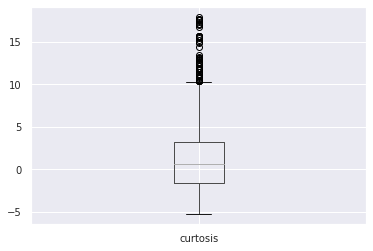

In [18]:
plt.show(data.boxplot('curtosis'))

In [19]:
data['curtosis'] = np.where(data['curtosis']>7.930929999999998, 7.930929999999998,data['curtosis'])
t=skew(data['curtosis'])
print("\033[1m Skewness of curtosis : {}".format(t))

 Skewness of curtosis : 0.43909904071359634


## entropy

In [20]:
print(f"\033[1m 10% quantile of entropy : {data['entropy'].quantile(0.10)}")
print(f"\033[1m 90% quantile of entropy : {data['entropy'].quantile(0.90)}")

 10% quantile of entropy : -4.18969
 90% quantile of entropy : 0.96765


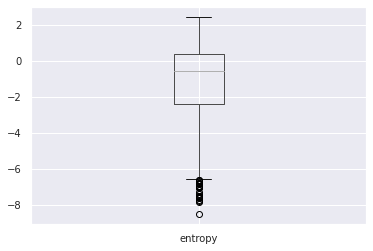

In [21]:
plt.show(data.boxplot('entropy'))

In [22]:
data['entropy'] = np.where(data['entropy']<-4.18969, -4.18969,data['curtosis'])
t=skew(data['entropy'])
print("\033[1m Skewness of entropy : {}".format(t))

 Skewness of entropy : 0.45000872882276105


In [23]:
X = data.iloc[:,:-1]

In [24]:
y=data.iloc[:,-1]

In [25]:
X

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.80730,-2.80730
1,4.54590,8.16740,-2.45860,-2.45860
2,3.86600,-2.63830,1.92420,1.92420
3,3.45660,9.52280,-4.01120,-4.01120
4,0.32924,-4.45520,4.57180,4.57180
...,...,...,...,...
1367,0.40614,1.34920,-1.45010,-1.45010
1368,-1.38870,-4.87730,6.47740,6.47740
1369,-3.75030,-13.45860,7.93093,7.93093
1370,-3.56370,-8.38270,7.93093,7.93093


In [26]:
# standard scalar
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(X)
X_scaled = pd.DataFrame(data=scalar.transform(X), columns=X.columns)

In [27]:
X_scaled

,variance,skewness,curtosis,entropy
0,1.109709,1.151820,-1.076910,-0.954105
1,1.432683,1.066810,-0.981488,-0.863302
2,1.195109,-0.775147,0.217876,0.278003
3,1.052054,1.297854,-1.406360,-1.267607
4,-0.040724,-1.084859,0.942398,0.967452
...,...,...,...,...
1343,-0.013853,-0.095431,-0.705509,-0.600683
1344,-0.641015,-1.156810,1.463870,1.463680
1345,-1.466217,-2.619593,1.861632,1.842187
1346,-1.401014,-1.754347,1.861632,1.842187


In [28]:
y.value_counts()

0    738
1    610
Name: class, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.33,random_state=42)

In [30]:
X_train.shape, X_test.shape

((903, 4), (445, 4))

#### Build a model (ANN) in tensorflow/keras

In [31]:
#Early stopping
from keras import callbacks
from keras import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Dropout

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
#model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.0001)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])



In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


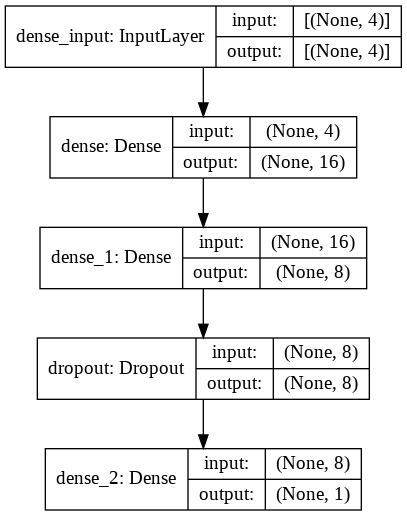

In [33]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='banknote_ann.png', show_shapes=True, show_layer_names=True)

In [34]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
23/23 [==============================] - 15s 26ms/step - loss: 0.6931 - accuracy: 0.5719 - val_loss: 0.6931 - val_accuracy: 0.5193
Epoch 2/150
23/23 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5780 - val_loss: 0.6930 - val_accuracy: 0.5193
Epoch 3/150
23/23 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5798 - val_loss: 0.6929 - val_accuracy: 0.5193
Epoch 4/150
23/23 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5870 - val_loss: 0.6928 - val_accuracy: 0.5193
Epoch 5/150
23/23 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5549 - val_loss: 0.6927 - val_accuracy: 0.5193
Epoch 6/150
23/23 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5444 - val_loss: 0.6925 - val_accuracy: 0.5193
Epoch 7/150
23/23 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5697 - val_loss: 0.6922 - val_accuracy: 0.5193
Epoch 8/150

In [35]:
model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.0528 - accuracy: 0.9910


[0.05279121920466423, 0.9910112619400024]

In [36]:
yp = model.predict(X_test)
yp[:5]

array([[0.24574476],
       [0.9569438 ],
       [0.98846453],
       [0.99676585],
       [0.97456205]], dtype=float32)

In [37]:
#y_pred = pd.DataFrame(yp)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [38]:
y_pred[:15]

[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0]

In [39]:
from sklearn.metrics import accuracy_score,f1_score , classification_report
print(f"\033[1mAccuracy score : {round(accuracy_score(y_test,y_pred)*100,5)} %\n")
print(f"\033[1mF1_Score : {round(f1_score(y_test,y_pred)*100,3)} %\n")
print('Classification Report')
print(classification_report(y_test,y_pred))

Accuracy score : 99.10112 %

F1_Score : 99.01 %

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       245
           1       0.98      1.00      0.99       200

    accuracy                           0.99       445
   macro avg       0.99      0.99      0.99       445
weighted avg       0.99      0.99      0.99       445



In [40]:
from sklearn.metrics import confusion_matrix
import itertools
cm = confusion_matrix(y_test, y_pred)

In [41]:
def plot_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title ='Confusion matix', 
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i,j],
             #horizontalalignments='center',
             color='white' if cm[i,j] > thresh else 'black')
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[241   4]
 [  0 200]]


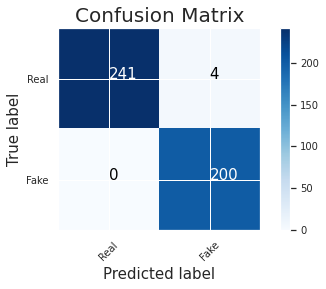

In [42]:
cm_plot_labels = ['Real','Fake']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [43]:
train_pd = model.predict(X_train)
train_pd[:5]
train_pred = []
for element in train_pd:
    if element > 0.5:
        train_pred.append(1)
    else:
        train_pred.append(0)
print(f"\033[1mTrain Accuracy score : {round(accuracy_score(y_train, train_pred)*100,5)} %\n")
print(f"F1_Score : {round(f1_score(y_train,train_pred)*100,3)} %\n")
print(classification_report(y_train,train_pred))

Train Accuracy score : 99.11406 %

F1_Score : 99.034 %

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       493
           1       0.98      1.00      0.99       410

    accuracy                           0.99       903
   macro avg       0.99      0.99      0.99       903
weighted avg       0.99      0.99      0.99       903



* For Test data, Model is getting <b>Accuracy score: 99.10%</b>
* For Train data,Model is getting <b>Accuracy score: 99.11%</b>
* So, <b>Model is not overfitting</b>

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


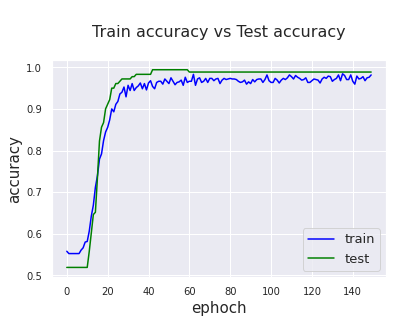

In [44]:
print(history.history.keys())
plt.plot(history.history['accuracy'],c='blue')
plt.plot(history.history['val_accuracy'],c='green')
plt.title('\nTrain accuracy vs Test accuracy\n',fontsize=16)
plt.xlabel('ephoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='lower right', fontsize=13)
plt.show()

In [45]:
weights=model.get_weights()

In [46]:
weights

[array([[ 0.1548677 ,  0.3259308 , -0.33828908, -0.36192113,  0.31716326,
         -0.3684619 ,  0.33855373,  0.37403005,  0.32205665, -0.3538434 ,
          0.27547777,  0.3213755 ,  0.29473546, -0.36596563,  0.3359742 ,
          0.31904426],
        [ 0.27605033,  0.33491066, -0.35148954, -0.368064  ,  0.32660124,
         -0.31637362,  0.33193627,  0.32574233,  0.3420627 , -0.3720867 ,
          0.37774947,  0.3454536 ,  0.38049707, -0.37270197,  0.29790714,
          0.27711463],
        [-0.39925727,  0.24886824,  0.21448615, -0.2325    ,  0.19483787,
          0.01822989,  0.206741  ,  0.14757219,  0.17972201, -0.18454911,
          0.19350967,  0.16708492,  0.18259865, -0.2447344 ,  0.18442225,
          0.20136458],
        [-0.3327985 ,  0.05148296,  0.18443422, -0.12320205,  0.10148211,
          0.05867635,  0.09813075,  0.07856749,  0.12800406, -0.18330657,
          0.11901518,  0.1423959 ,  0.1385344 , -0.13400793,  0.09978016,
          0.06274886]], dtype=float32),
 ar

In [47]:
weights, biases=model.layers[0].get_weights()

In [48]:
biases

array([0.39833194, 0.31117693, 0.37023368, 0.34718144, 0.29310036,
       0.35667497, 0.3100582 , 0.36541328, 0.3103884 , 0.34934756,
       0.30308083, 0.30735394, 0.3090715 , 0.3455075 , 0.28862557,
       0.27743363], dtype=float32)

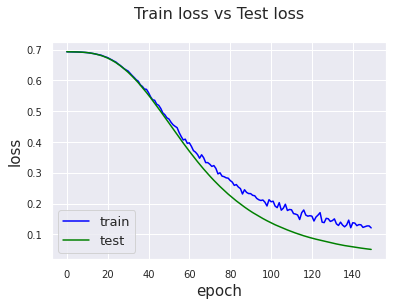

In [49]:
plt.plot(history.history['loss'],c='blue')
plt.plot(history.history['val_loss'],c='green')
plt.title('Train loss vs Test loss\n',fontsize=16)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='lower left',fontsize=13)
plt.show()

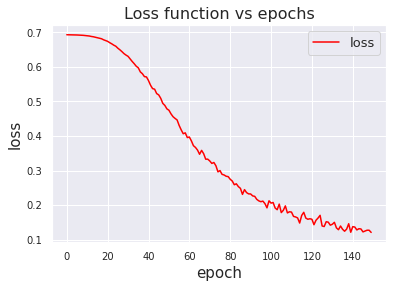

In [50]:
plt.plot(history.history['loss'], c='red')
plt.title('Loss function vs epochs',fontsize=16)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss'],loc='upper right',fontsize=13)
plt.show()

In [51]:
print("""\033[1m
    For class information \n
    value > 0.5 then 1
    value < 0.5 then 0          
    """)
model.predict([[-1.38870, -4.87730,	6.4774,	0.34179]])


    For class information 

    value > 0.5 then 1
    value < 0.5 then 0          
    


array([[0.99925005]], dtype=float32)